In [1]:
import chollaread
import numpy as np
import yt
import trident
import matplotlib.pyplot as plt
import pylab as p

/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [3]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5')

yt : [INFO     ] 2021-08-11 12:27:05,069 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-08-11 12:27:05,072 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2021-08-11 12:27:05,077 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-08-11 12:27:05,081 Parameters: domain_right_edge         = [6.172e+21 3.086e+21 3.086e+21]
yt : [INFO     ] 2021-08-11 12:27:05,083 Parameters: cosmological_simulation   = 0.0


In [4]:
def make_ray(x0, y0, z0, x, y, z, ray_name):
    
    k = 3.086E+21 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= ray_name,
                                 lines='all',
                                 ftype='gas')
    return ray

In [5]:
# sg = trident.SpectrumGenerator(lambda_min='auto', lambda_max='auto', dlambda=1.,
#                                 bin_space='velocity')


def spec():
    sg = trident.SpectrumGenerator(lambda_min='auto', lambda_max='auto', dlambda=0.001)
    sg.make_spectrum(ray, lines=line_list)
    sg.save_spectrum(txt)
    
    sg_ = trident.SpectrumGenerator(lambda_min='auto', lambda_max='auto', dlambda=1.,
                                bin_space='velocity')
    sg_.make_spectrum(ray, lines=line_list)
    sg_.save_spectrum(txt2)
    
    f = np.loadtxt(txt)
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    f_ = np.loadtxt(txt2)
    Vel = f_[:,0] # All rows, 1st column
    flux_ = f_[:,2]
    
    
    fig = plt.figure(figsize=(15, 7))
    
    p1 = fig.add_subplot(1,2,1)
    plt.title(Title)
    plt.plot(lam, flux)
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')
    
    p2 = fig.add_subplot(1,2,2)
    plt.title(Title)
    plt.plot(Vel, flux_)
    plt.xlabel('Velocity Offset')
    plt.ylabel('Relative Flux')
    
    

In [6]:
def denvel():
    plt.figure(figsize=(35,15))
    plt.scatter(1e-5*ray.all_data()['velocity_los'], 6e23*ray.all_data()['density'], color='black')    
    plt.title('Density vs. Velocity', fontsize=30)
    plt.xlabel('Velocity', fontsize=30)
    plt.ylabel('Density', fontsize=30)
    plt.yscale('log')
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    plt.show()

In [7]:
def xvel():
    sl = yt.SlicePlot(ds, "z", [("velocity_x")])
    sl.annotate_ray(ray, arrow=True)

    sl.set_cmap(("velocity_x"), "BLUE-RED")

    sl.show()

In [8]:
ray = make_ray(0, .65, .5, 2, .65, .5, 'ray.h5')

yt : [INFO     ] 2021-08-11 12:27:55,775 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-08-11 12:27:55,793 Getting subsegment: [0.0 unitary, 0.325 unitary, 0.25 unitary] to [1.0 unitary, 0.325 unitary, 0.25 unitary].
yt : [INFO     ] 2021-08-11 12:27:57,080 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-08-11 12:27:57,362 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-08-11 12:27:57,363 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-08-11 12:27:57,364 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-08-11 12:27:57,365 Parameters: domain_right_edge         = [6.172e+21 3.086e+21 3.086e+21] code_length
yt : [INFO     ] 2021-08-11 

yt : [INFO     ] 2021-08-11 12:28:01,031 xlim = 0.000000 6172000000000000000000.000000
yt : [INFO     ] 2021-08-11 12:28:01,032 ylim = 0.000000 3086000000000000000000.000000
yt : [INFO     ] 2021-08-11 12:28:01,034 xlim = 0.000000 6172000000000000000000.000000
yt : [INFO     ] 2021-08-11 12:28:01,034 ylim = 0.000000 3086000000000000000000.000000
yt : [INFO     ] 2021-08-11 12:28:01,036 Making a fixed resolution buffer of (('gas', 'velocity_x')) 800 by 800
yt : [WARNING  ] 2021-08-11 12:28:01,157 Plot image for field ('gas', 'velocity_x') has both positive and negative values. Min = -20883941.000001, Max = 12383630.000001.
yt : [WARNING  ] 2021-08-11 12:28:01,158 Switching to symlog colorbar scaling unless linear scaling is specified later
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:220: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = matplot


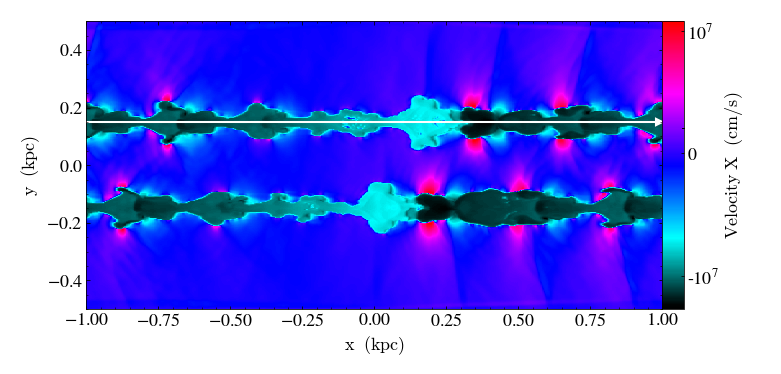

In [9]:
xvel()

yt : [INFO     ] 2021-08-11 12:28:04,196 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-08-11 12:28:04,204 Identified 2.490e+02 octs


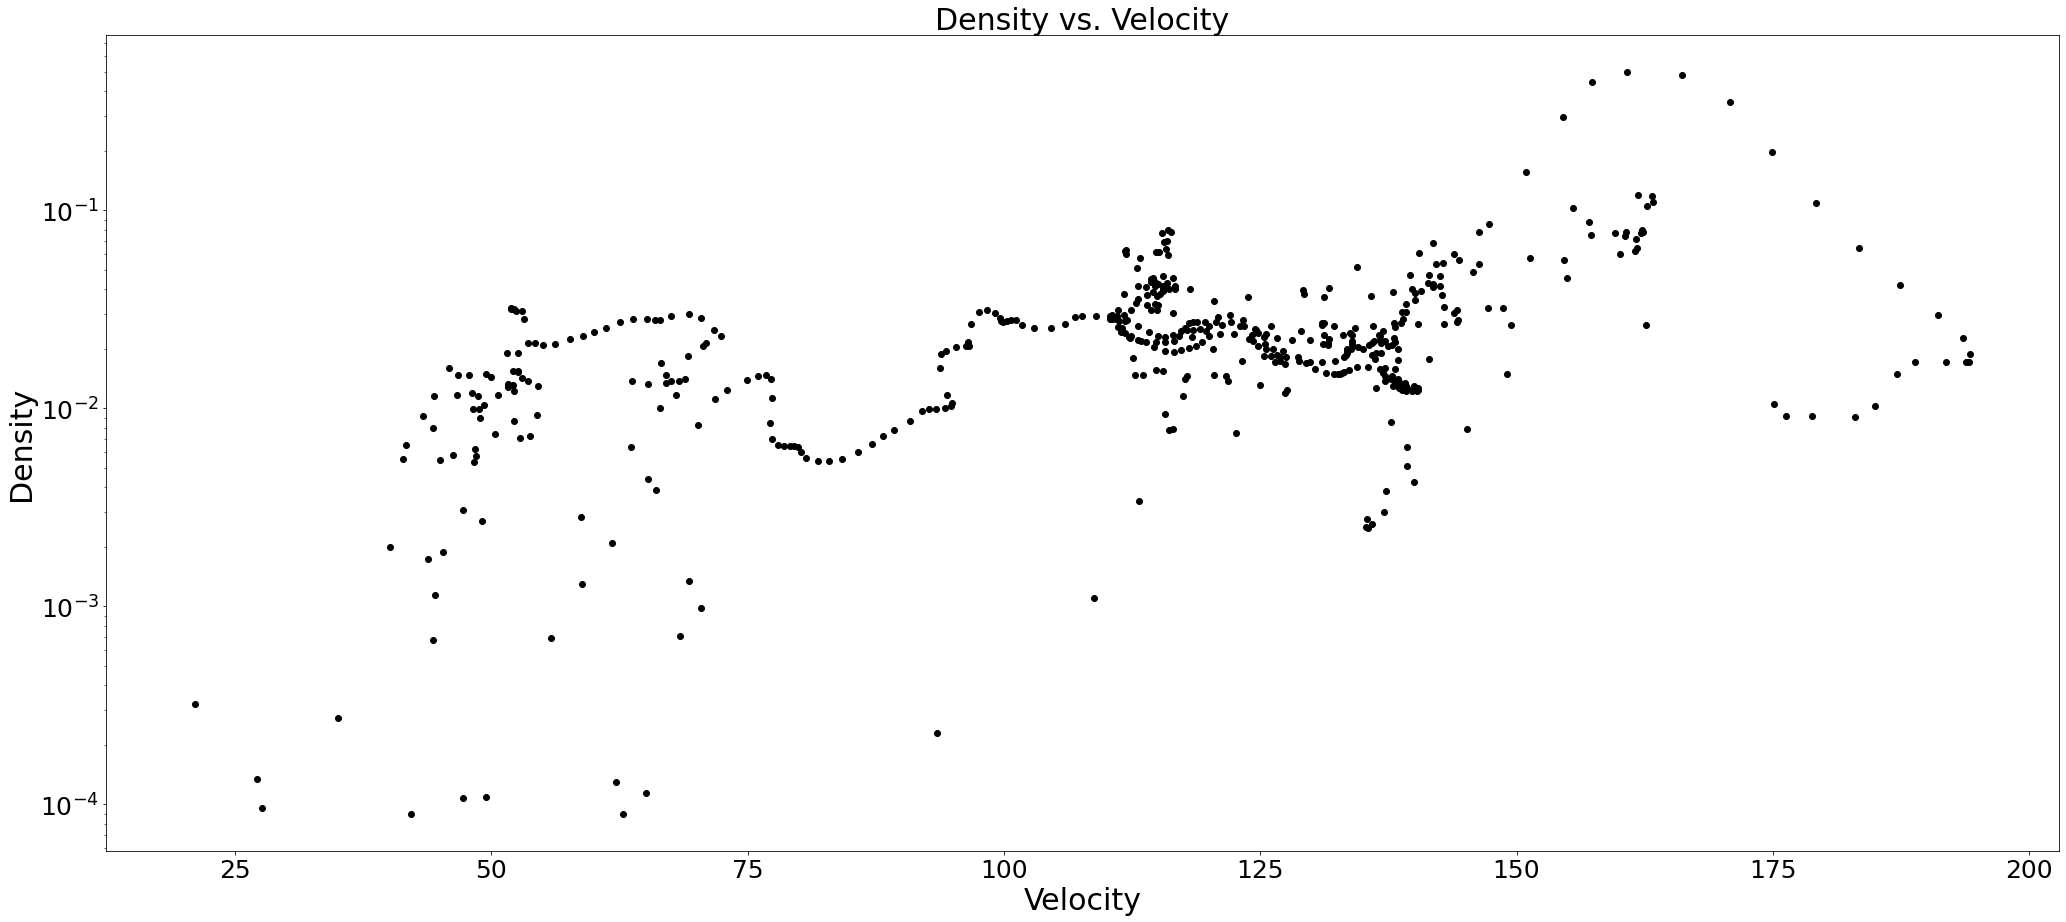

In [10]:
denvel()

yt : [INFO     ] 2021-08-09 15:23:30,111 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:23:30,124 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 512/512 [00:10<00:00, 49.54it/s]
yt : [INFO     ] 2021-08-09 15:23:40,563 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2021-08-09 15:23:40,564 Writing spectrum to ascii file: lya.txt.
yt : [INFO     ] 2021-08-09 15:23:40,958 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:23:40,962 Creating spectrum
yt : [INFO     ] 2021-08-09 15:23:40,963 Setting wavelength of velocity center to Ly a line at z = 0.000: 1215.67 angstrom.
Adding continuum - Ly C [912.323360 A]: : 100%|██████████| 492/492 [00:00<00:00, 6808.17it/s]
yt : [INFO     ] 2021-08-09 15:23:45,685 Writing spectrum to ascii file: lya2.txt.


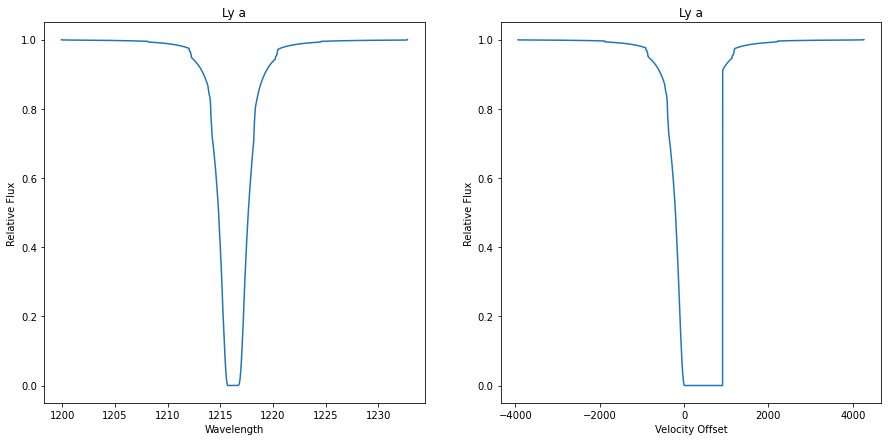

In [27]:
line_list = ['Ly a']
Title = 'Ly a'
txt = 'lya.txt'
txt2 = 'lya2.txt'

spec()

yt : [INFO     ] 2021-08-09 15:23:50,646 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:23:50,655 Creating spectrum
Adding line - C I 1158 [1157.910000 A]: : 100%|██████████| 512/512 [00:01<00:00, 388.98it/s]
yt : [INFO     ] 2021-08-09 15:23:52,052 Writing spectrum to ascii file: C1_1158.txt.
yt : [INFO     ] 2021-08-09 15:23:52,061 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:23:52,070 Creating spectrum
yt : [INFO     ] 2021-08-09 15:23:52,071 Setting wavelength of velocity center to C I 1158 line at z = 0.000: 1157.91 angstrom.
Adding line - C I 1158 [1157.910000 A]: : 100%|██████████| 512/512 [00:01<00:00, 504.93it/s]
yt : [INFO     ] 2021-08-09 15:23:53,167 Writing spectrum to ascii file: C1_1158_2.txt.


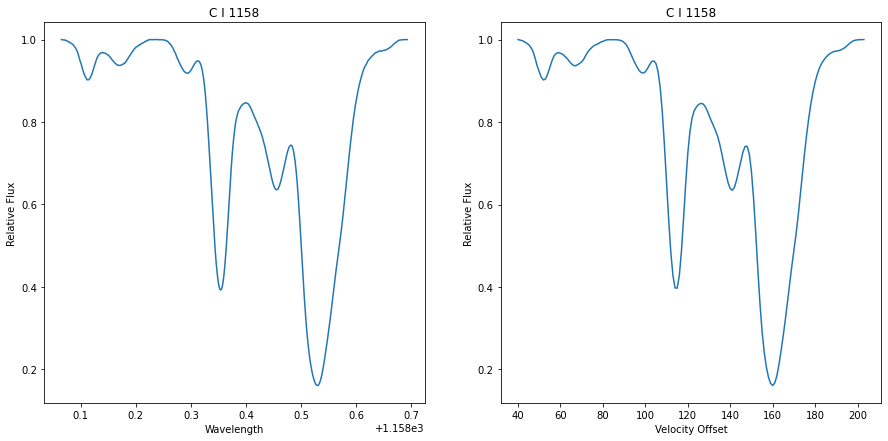

In [28]:
line_list = ['C I 1158']
Title = 'C I 1158'
txt = 'C1_1158.txt'
txt2 = 'C1_1158_2.txt'

spec()

yt : [INFO     ] 2021-08-09 15:30:38,243 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:30:38,250 Creating spectrum
Adding line - N II 1084 [1083.990000 A]: : 100%|██████████| 512/512 [00:01<00:00, 301.75it/s]
yt : [INFO     ] 2021-08-09 15:30:40,034 Writing spectrum to ascii file: NII_1084.txt.
yt : [INFO     ] 2021-08-09 15:30:40,043 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:30:40,050 Creating spectrum
yt : [INFO     ] 2021-08-09 15:30:40,053 Setting wavelength of velocity center to N II 1084 line at z = 0.000: 1083.99 angstrom.
Adding line - N II 1084 [1083.990000 A]: : 100%|██████████| 512/512 [00:01<00:00, 414.20it/s]
yt : [INFO     ] 2021-08-09 15:30:41,368 Writing spectrum to ascii file: NII_1084_2.txt.


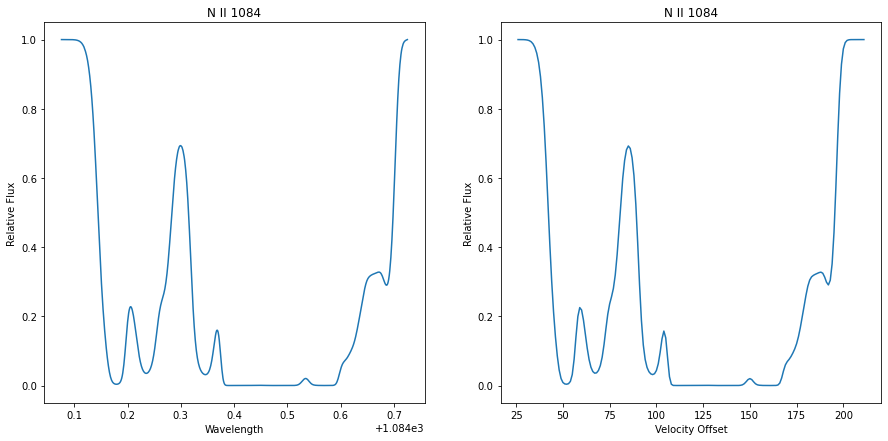

In [31]:
line_list = ['N II 1084']
Title = 'N II 1084'
txt = 'NII_1084.txt'
txt2 = 'NII_1084_2.txt'

spec()

yt : [INFO     ] 2021-08-09 15:36:01,418 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:36:01,431 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 512/512 [00:01<00:00, 306.23it/s]
yt : [INFO     ] 2021-08-09 15:36:03,192 Writing spectrum to ascii file: OII_834.txt.
yt : [INFO     ] 2021-08-09 15:36:03,201 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:36:03,208 Creating spectrum
yt : [INFO     ] 2021-08-09 15:36:03,211 Setting wavelength of velocity center to O II 834 line at z = 0.000: 834.4654 angstrom.
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 512/512 [00:01<00:00, 364.05it/s]
yt : [INFO     ] 2021-08-09 15:36:04,709 Writing spectrum to ascii file: oII_834_2.txt.


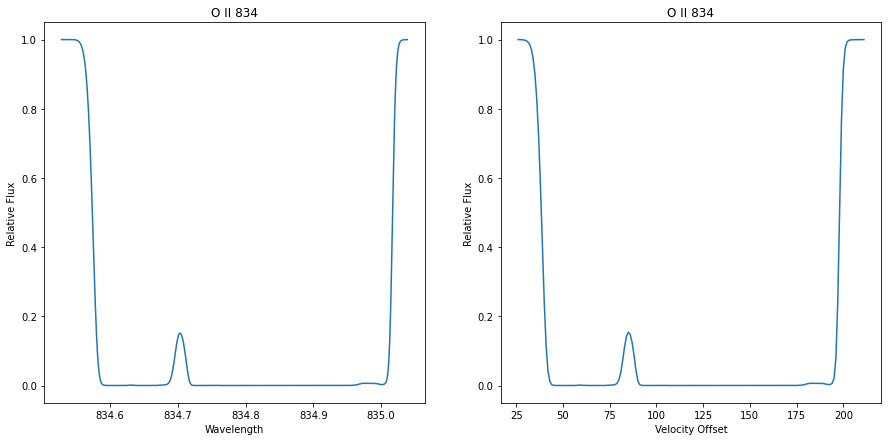

In [33]:
line_list = ['O II 834']
Title = 'O II 834'
txt = 'OII_834.txt'
txt2 = 'oII_834_2.txt'

spec()

yt : [INFO     ] 2021-08-09 15:44:20,921 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:44:20,929 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-09 15:44:21,101 Creating spectrum
Adding line - Si II* 1265 [1264.738000 A]: : 100%|██████████| 512/512 [00:01<00:00, 333.25it/s]
yt : [INFO     ] 2021-08-09 15:44:22,700 Writing spectrum to ascii file: SiII_1265.txt.
yt : [INFO     ] 2021-08-09 15:44:22,709 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:44:22,719 Creating spectrum
yt : [INFO     ] 2021-08-09 15:44:22,720 Setting wavelength of velocity center to Si II* 1265 line at z = 0.000: 1264.738 angstrom.
Adding line - Si II* 1265 [1264.738000 A]: : 100%|██████████| 512/512 [00:01<00:00, 453.86it/s]
yt : [INFO     ] 2021-08-09 15:44:23,929 Writing spectrum to ascii file: SiII_1265_2.txt.


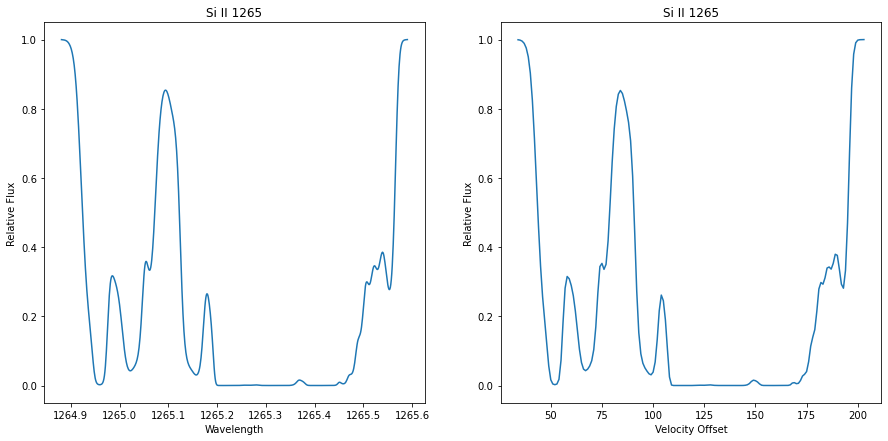

In [39]:
line_list = ['Si II* 1265']
Title = 'Si II 1265'
txt = 'SiII_1265.txt'
txt2 = 'SiII_1265_2.txt'

spec()

yt : [INFO     ] 2021-08-09 15:48:47,548 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:48:47,554 Creating S_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-09 15:48:47,766 Creating spectrum
Adding line - S II 1260 [1259.519000 A]: : 100%|██████████| 512/512 [00:01<00:00, 335.75it/s]
yt : [INFO     ] 2021-08-09 15:48:49,376 Writing spectrum to ascii file: SII_1260.txt.
yt : [INFO     ] 2021-08-09 15:48:49,386 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:48:49,394 Creating spectrum
yt : [INFO     ] 2021-08-09 15:48:49,395 Setting wavelength of velocity center to S II 1260 line at z = 0.000: 1259.519 angstrom.
Adding line - S II 1260 [1259.519000 A]: : 100%|██████████| 512/512 [00:01<00:00, 503.58it/s]
yt : [INFO     ] 2021-08-09 15:48:50,503 Writing spectrum to ascii file: SII_1260_2.txt.


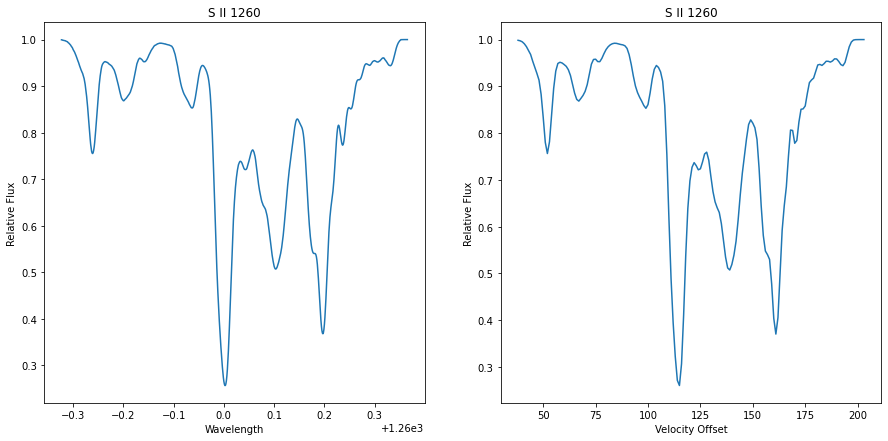

In [40]:
line_list = ['S II 1260']
Title = 'S II 1260'
txt = 'SII_1260.txt'
txt2 = 'SII_1260_2.txt'

spec()

yt : [INFO     ] 2021-08-09 15:51:47,553 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:51:47,561 Creating Ar_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-09 15:51:47,725 Creating spectrum
Adding line - Ar I 1067 [1066.660000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1162.88it/s]
yt : [INFO     ] 2021-08-09 15:51:48,247 Writing spectrum to ascii file: ArI_1067.txt.
yt : [INFO     ] 2021-08-09 15:51:48,256 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:51:48,261 Creating spectrum
yt : [INFO     ] 2021-08-09 15:51:48,262 Setting wavelength of velocity center to Ar I 1067 line at z = 0.000: 1066.66 angstrom.
Adding line - Ar I 1067 [1066.660000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1242.52it/s]
yt : [INFO     ] 2021-08-09 15:51:48,749 Writing spectrum to ascii file: ArI_1067_2.txt.


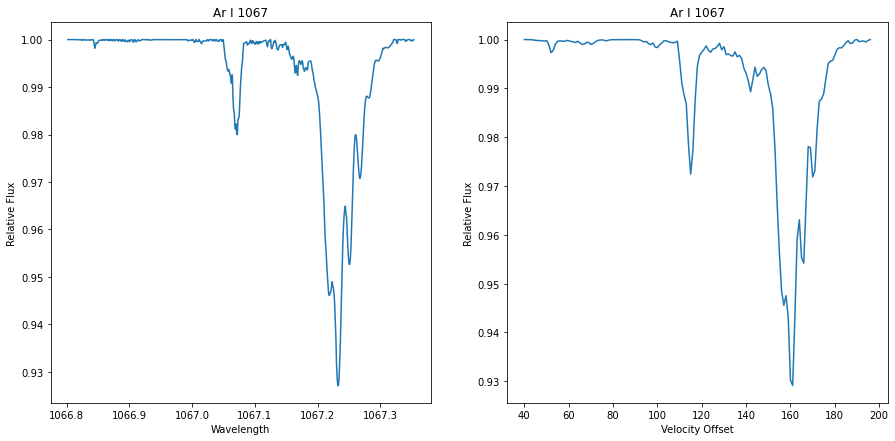

In [41]:
line_list = ['Ar I 1067']
Title = 'Ar I 1067'
txt = 'ArI_1067.txt'
txt2 = 'ArI_1067_2.txt'

spec()

yt : [INFO     ] 2021-08-09 15:54:49,491 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:54:49,500 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-09 15:54:49,825 Creating spectrum
Adding line - Fe II 1097 [1096.876870 A]: : 100%|██████████| 512/512 [00:01<00:00, 336.48it/s]
yt : [INFO     ] 2021-08-09 15:54:51,419 Writing spectrum to ascii file: FeII_1097.txt.
yt : [INFO     ] 2021-08-09 15:54:51,427 Setting instrument to Custom
yt : [INFO     ] 2021-08-09 15:54:51,434 Creating spectrum
yt : [INFO     ] 2021-08-09 15:54:51,440 Setting wavelength of velocity center to Fe II 1097 line at z = 0.000: 1096.87687 angstrom.
Adding line - Fe II 1097 [1096.876870 A]: : 100%|██████████| 512/512 [00:01<00:00, 495.20it/s]
yt : [INFO     ] 2021-08-09 15:54:52,572 Writing spectrum to ascii file: FeII_1097_2.txt.


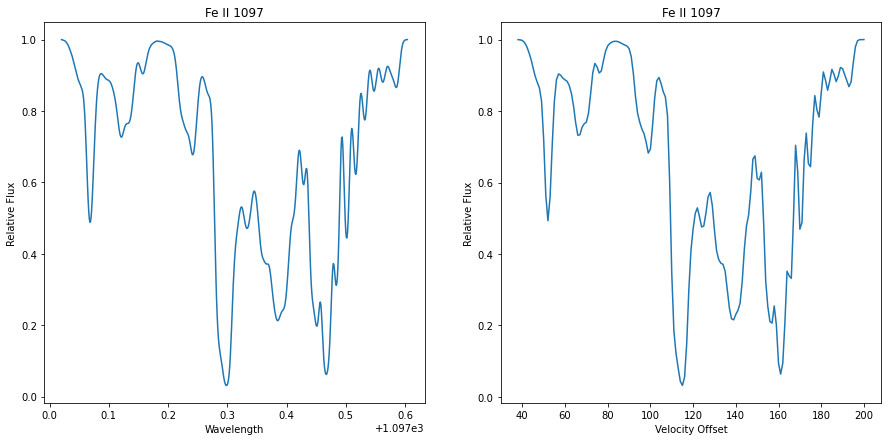

In [42]:
line_list = ['Fe II 1097']
Title = 'Fe II 1097'
txt = 'FeII_1097.txt'
txt2 = 'FeII_1097_2.txt'

spec()

# Higher ionization spectra

yt : [INFO     ] 2021-08-11 12:42:27,631 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:42:27,648 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:42:27,836 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 512/512 [00:01<00:00, 304.41it/s]
yt : [INFO     ] 2021-08-11 12:42:29,597 Writing spectrum to ascii file: SiIII.txt.
yt : [INFO     ] 2021-08-11 12:42:29,607 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:42:29,612 Creating spectrum
yt : [INFO     ] 2021-08-11 12:42:29,614 Setting wavelength of velocity center to Si III 1206 line at z = 0.000: 1206.5 angstrom.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 512/512 [00:01<00:00, 461.05it/s]
yt : [INFO     ] 2021-08-11 12:42:30,819 Writing spectrum to ascii file: SiIII_2.txt.


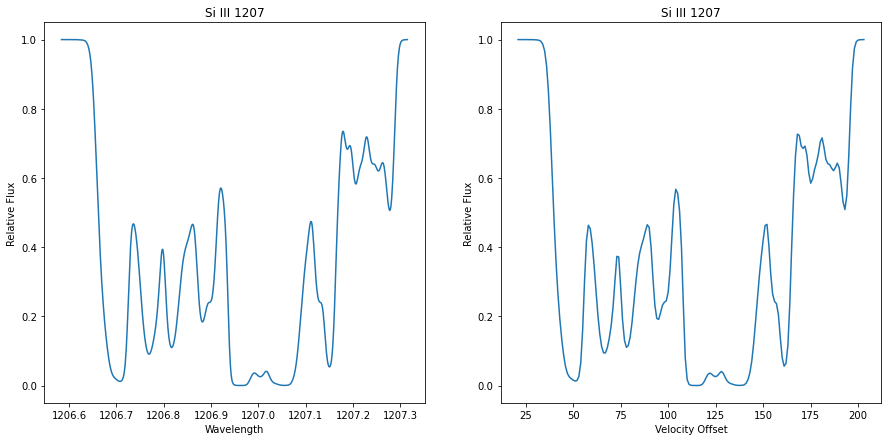

In [13]:
line_list = ['Si III']
Title = "Si III 1207"
txt = 'SiIII.txt'
txt2 = 'SiIII_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:44:28,727 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:44:28,739 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:44:28,922 Creating spectrum
Adding line - Si IV 1403 [1402.770000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1229.37it/s]
yt : [INFO     ] 2021-08-11 12:44:29,423 Writing spectrum to ascii file: SiIV.txt.
yt : [INFO     ] 2021-08-11 12:44:29,435 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:44:29,444 Creating spectrum
yt : [INFO     ] 2021-08-11 12:44:29,447 Setting wavelength of velocity center to Si IV 1403 line at z = 0.000: 1402.77 angstrom.
Adding line - Si IV 1403 [1402.770000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1151.79it/s]
yt : [INFO     ] 2021-08-11 12:44:29,984 Writing spectrum to ascii file: SiIV_2.txt.


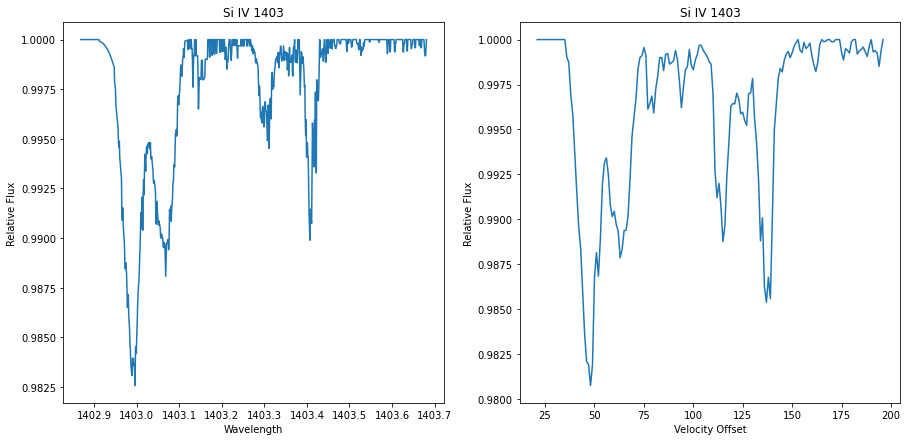

In [14]:
line_list = ['Si IV']
Title = "Si IV 1403"
txt = 'SiIV.txt'
txt2 = 'SiIV_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:48:07,617 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:48:07,626 Creating O_p5_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:48:07,720 Creating spectrum
Adding line - O VI 1038 [1037.613000 A]: : 100%|██████████| 512/512 [00:00<00:00, 5486.08it/s]
yt : [INFO     ] 2021-08-11 12:48:07,878 Writing spectrum to ascii file: OVI_1038.txt.
yt : [INFO     ] 2021-08-11 12:48:07,889 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:48:07,902 Creating spectrum
yt : [INFO     ] 2021-08-11 12:48:07,904 Setting wavelength of velocity center to O VI 1038 line at z = 0.000: 1037.613 angstrom.
Adding line - O VI 1038 [1037.613000 A]: : 100%|██████████| 512/512 [00:00<00:00, 7688.86it/s]
yt : [INFO     ] 2021-08-11 12:48:08,039 Writing spectrum to ascii file: OVI_1038_2.txt.


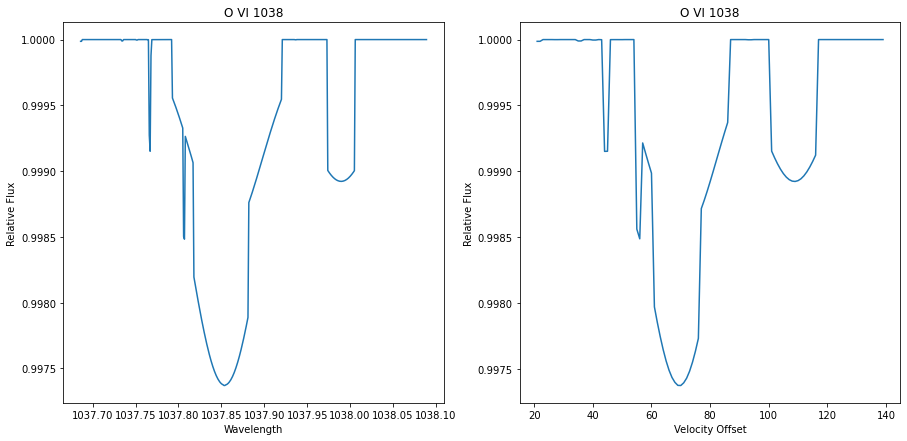

In [16]:
line_list = ['O VI 1038']
Title = "O VI 1038"
txt = 'OVI_1038.txt'
txt2 = 'OVI_1038_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:49:34,116 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:49:34,123 Creating O_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:49:34,156 Creating spectrum
Adding line - O IV* 790 [790.199000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1149.50it/s]
yt : [INFO     ] 2021-08-11 12:49:34,882 Writing spectrum to ascii file: OIV_790.txt.
yt : [INFO     ] 2021-08-11 12:49:34,890 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:49:34,894 Creating spectrum
yt : [INFO     ] 2021-08-11 12:49:34,895 Setting wavelength of velocity center to O IV* 790 line at z = 0.000: 790.199 angstrom.
Adding line - O IV* 790 [790.199000 A]: : 100%|██████████| 512/512 [00:00<00:00, 948.00it/s]
yt : [INFO     ] 2021-08-11 12:49:35,539 Writing spectrum to ascii file: OIV_790_2.txt.


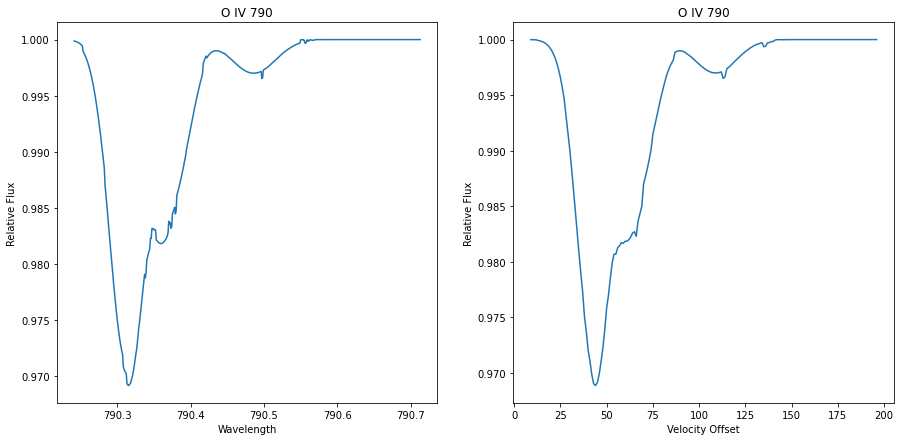

In [17]:
line_list = ['O IV* 790']
Title = "O IV 790"
txt = 'OIV_790.txt'
txt2 = 'OIV_790_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:52:07,460 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:52:07,468 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:52:07,574 Creating spectrum
Adding line - O III* 703 [702.838000 A]: : 100%|██████████| 512/512 [00:00<00:00, 566.59it/s]
yt : [INFO     ] 2021-08-11 12:52:08,551 Writing spectrum to ascii file: OIII_703.txt.
yt : [INFO     ] 2021-08-11 12:52:08,557 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:52:08,561 Creating spectrum
yt : [INFO     ] 2021-08-11 12:52:08,562 Setting wavelength of velocity center to O III* 703 line at z = 0.000: 702.838 angstrom.
Adding line - O III* 703 [702.838000 A]: : 100%|██████████| 512/512 [00:00<00:00, 766.40it/s] 
yt : [INFO     ] 2021-08-11 12:52:09,304 Writing spectrum to ascii file: OIII_703_2.txt.


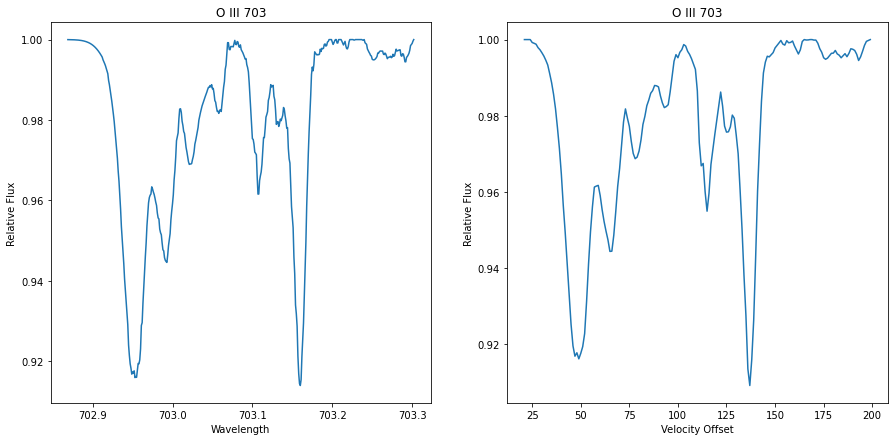

In [18]:
line_list = ['O III* 703']
Title = "O III 703"
txt = 'OIII_703.txt'
txt2 = 'OIII_703_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:53:20,825 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:53:20,833 Creating N_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:53:20,907 Creating spectrum
Adding line - N III 990 [989.799000 A]: : 100%|██████████| 512/512 [00:00<00:00, 737.99it/s]
yt : [INFO     ] 2021-08-11 12:53:21,658 Writing spectrum to ascii file: NIII.txt.
yt : [INFO     ] 2021-08-11 12:53:21,670 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:53:21,678 Creating spectrum
yt : [INFO     ] 2021-08-11 12:53:21,679 Setting wavelength of velocity center to N III 990 line at z = 0.000: 989.799 angstrom.
Adding line - N III 990 [989.799000 A]: : 100%|██████████| 512/512 [00:00<00:00, 775.36it/s] 
yt : [INFO     ] 2021-08-11 12:53:22,429 Writing spectrum to ascii file: NIII_2.txt.


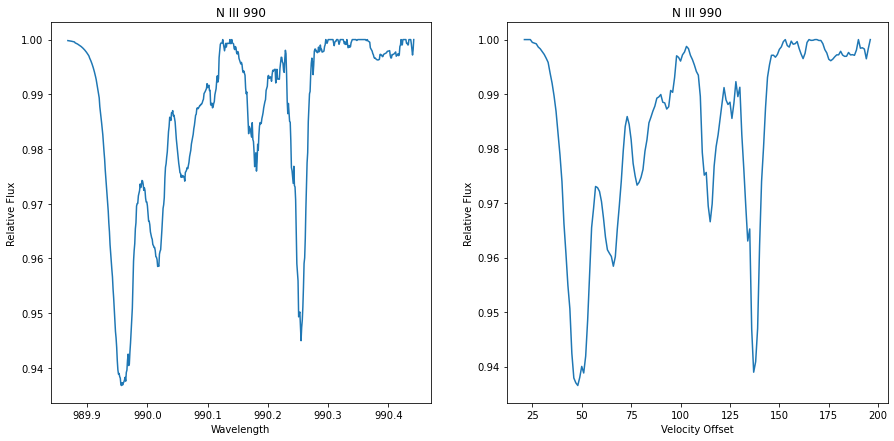

In [19]:
line_list = ['N III']
Title = "N III 990"
txt = 'NIII.txt'
txt2 = 'NIII_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:54:13,770 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:54:13,777 Creating N_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:54:13,809 Creating spectrum
Adding line - N IV 765 [765.147000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1226.96it/s]
yt : [INFO     ] 2021-08-11 12:54:14,286 Writing spectrum to ascii file: NIV.txt.
yt : [INFO     ] 2021-08-11 12:54:14,293 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:54:14,301 Creating spectrum
yt : [INFO     ] 2021-08-11 12:54:14,302 Setting wavelength of velocity center to N IV 765 line at z = 0.000: 765.147 angstrom.
Adding line - N IV 765 [765.147000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1301.74it/s]
yt : [INFO     ] 2021-08-11 12:54:14,773 Writing spectrum to ascii file: NIV_2.txt.


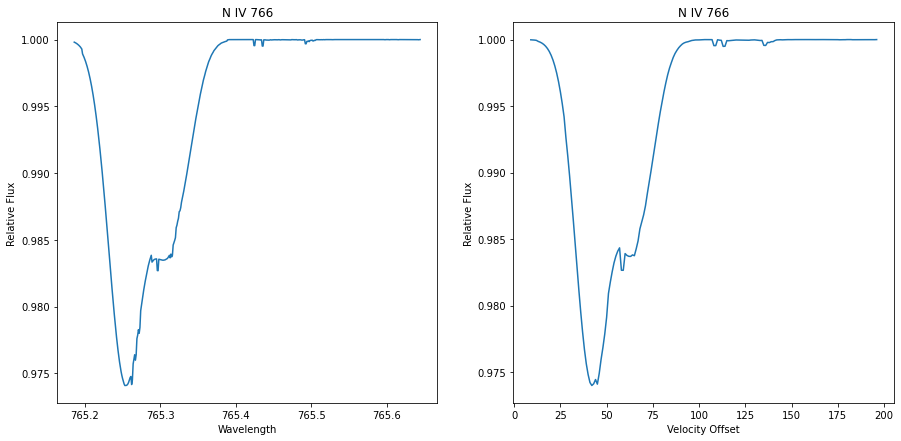

In [20]:
line_list = ['N IV']
Title = "N IV 766"
txt = 'NIV.txt'
txt2 = 'NIV_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:55:04,483 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:55:04,490 Creating N_p4_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:55:04,520 Creating spectrum
Adding line - N V 1243 [1242.804000 A]: : 100%|██████████| 512/512 [00:00<00:00, 6295.34it/s]
yt : [INFO     ] 2021-08-11 12:55:04,659 Writing spectrum to ascii file: NV1243.txt.
yt : [INFO     ] 2021-08-11 12:55:04,669 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:55:04,674 Creating spectrum
yt : [INFO     ] 2021-08-11 12:55:04,675 Setting wavelength of velocity center to N V 1243 line at z = 0.000: 1242.804 angstrom.
Adding line - N V 1243 [1242.804000 A]: : 100%|██████████| 512/512 [00:00<00:00, 4863.13it/s]
yt : [INFO     ] 2021-08-11 12:55:04,841 Writing spectrum to ascii file: NV1243_2.txt.


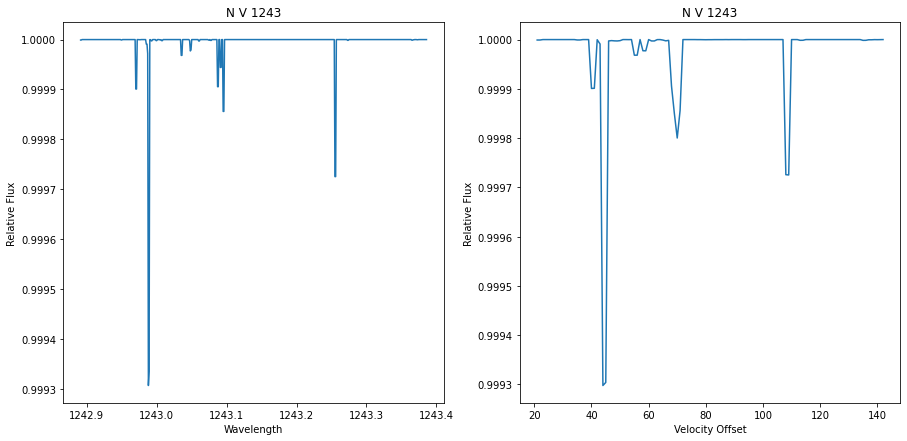

In [21]:
line_list = ['N V 1243']
Title = "N V 1243"
txt = 'NV1243.txt'
txt2 = 'NV1243_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:57:00,946 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:57:00,964 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:57:01,020 Creating spectrum
Adding line - C III 977 [977.020000 A]: : 100%|██████████| 512/512 [00:01<00:00, 289.85it/s]
yt : [INFO     ] 2021-08-11 12:57:02,854 Writing spectrum to ascii file: CIII978.txt.
yt : [INFO     ] 2021-08-11 12:57:02,865 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:57:02,871 Creating spectrum
yt : [INFO     ] 2021-08-11 12:57:02,873 Setting wavelength of velocity center to C III 977 line at z = 0.000: 977.02 angstrom.
Adding line - C III 977 [977.020000 A]: : 100%|██████████| 512/512 [00:01<00:00, 306.91it/s]
yt : [INFO     ] 2021-08-11 12:57:04,629 Writing spectrum to ascii file: CIII978_2.txt.


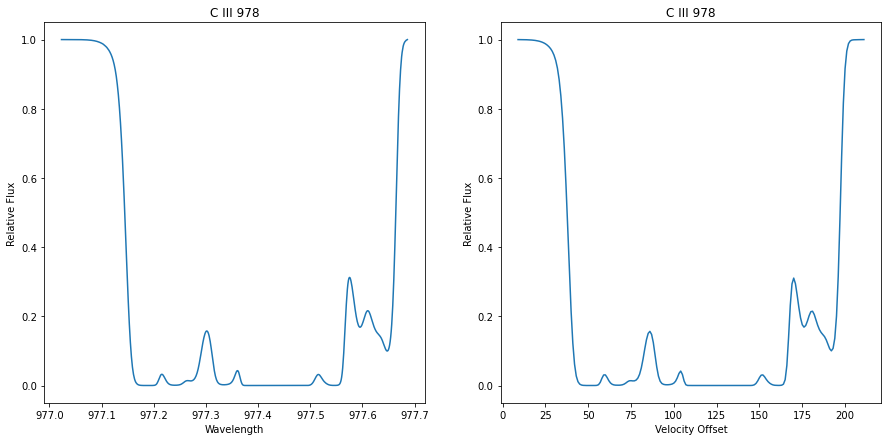

In [22]:
line_list = ['C III']
Title = 'C III 978'
txt = 'CIII978.txt'
txt2 = 'CIII978_2.txt'

spec()

yt : [INFO     ] 2021-08-11 12:58:34,430 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:58:34,438 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-08-11 12:58:34,474 Creating spectrum
Adding line - C IV 1551 [1550.772000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1196.58it/s]
yt : [INFO     ] 2021-08-11 12:58:34,959 Writing spectrum to ascii file: CIV1551.txt.
yt : [INFO     ] 2021-08-11 12:58:34,976 Setting instrument to Custom
yt : [INFO     ] 2021-08-11 12:58:34,986 Creating spectrum
yt : [INFO     ] 2021-08-11 12:58:34,989 Setting wavelength of velocity center to C IV 1551 line at z = 0.000: 1550.772 angstrom.
Adding line - C IV 1551 [1550.772000 A]: : 100%|██████████| 512/512 [00:00<00:00, 878.49it/s]
yt : [INFO     ] 2021-08-11 12:58:35,682 Writing spectrum to ascii file: CIV1551_2.txt.


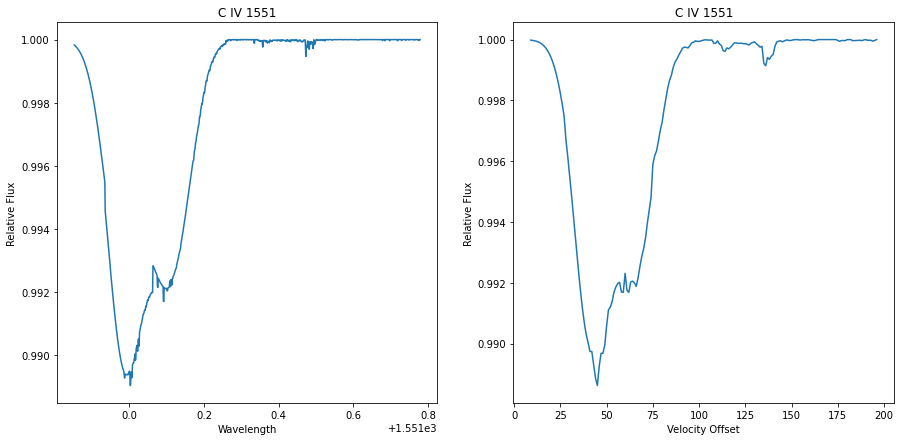

In [24]:
line_list = ['C IV 1551']
Title = 'C IV 1551'
txt = 'CIV1551.txt'
txt2 = 'CIV1551_2.txt'

spec()